In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/mnist/naive

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 368 (delta 39), reused 82 (delta 19), pack-reused 222 (from 2)
Receiving objects: 100% (368/368), 229.55 MiB | 36.06 MiB/s, done.
Resolving deltas: 100% (115/115), done.
Updating files: 100% (79/79), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/naive


## Dependecies

In [2]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.simple_cnn import init_model_cnn

Device used: cuda


## Parameters (arbitrary chosen)

In [5]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10

# Simple base training

## Init model

In [10]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)

Init model...
Done initializing model.
Model ID: 132960278527616, Optimizer ID: 132960278927472, Criterion ID: 132960278937552


## Init dataloaders

In [7]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)
data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset), 
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path = data_split_path, 
    )

Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [11]:
import time
start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.16it/s]


Epoch [1/10], Train Loss: 0.1800, Train Accuracy: 0.9450, Val Loss: 0.0834, Val Accuracy: 0.9743
Epoch 1: New best validation accuracy: 0.9743. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.75it/s]


Epoch [2/10], Train Loss: 0.0481, Train Accuracy: 0.9852, Val Loss: 0.0663, Val Accuracy: 0.9788
Epoch 2: New best validation accuracy: 0.9788. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.05it/s]


Epoch [3/10], Train Loss: 0.0331, Train Accuracy: 0.9896, Val Loss: 0.0449, Val Accuracy: 0.9868
Epoch 3: New best validation accuracy: 0.9868. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.75it/s]


Epoch [4/10], Train Loss: 0.0233, Train Accuracy: 0.9926, Val Loss: 0.0403, Val Accuracy: 0.9876
Epoch 4: New best validation accuracy: 0.9876. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 68.99it/s]


Epoch [5/10], Train Loss: 0.0200, Train Accuracy: 0.9935, Val Loss: 0.0460, Val Accuracy: 0.9872


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.67it/s]


Epoch [6/10], Train Loss: 0.0140, Train Accuracy: 0.9957, Val Loss: 0.0448, Val Accuracy: 0.9868


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 72.18it/s]


Epoch [7/10], Train Loss: 0.0102, Train Accuracy: 0.9966, Val Loss: 0.0492, Val Accuracy: 0.9864


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 74.38it/s]


Epoch [8/10], Train Loss: 0.0119, Train Accuracy: 0.9962, Val Loss: 0.0487, Val Accuracy: 0.9883
Epoch 8: New best validation accuracy: 0.9883. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 75.05it/s]


Epoch [9/10], Train Loss: 0.0088, Train Accuracy: 0.9969, Val Loss: 0.0407, Val Accuracy: 0.9895
Epoch 9: New best validation accuracy: 0.9895. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 188/188 [00:02<00:00, 73.62it/s]

Epoch [10/10], Train Loss: 0.0079, Train Accuracy: 0.9971, Val Loss: 0.0503, Val Accuracy: 0.9885
Training complete for CNN_MNIST. Training stats saved to 'CNN_MNIST_history.json'.
Execution time: 167.457770 seconds


## Plot history losses

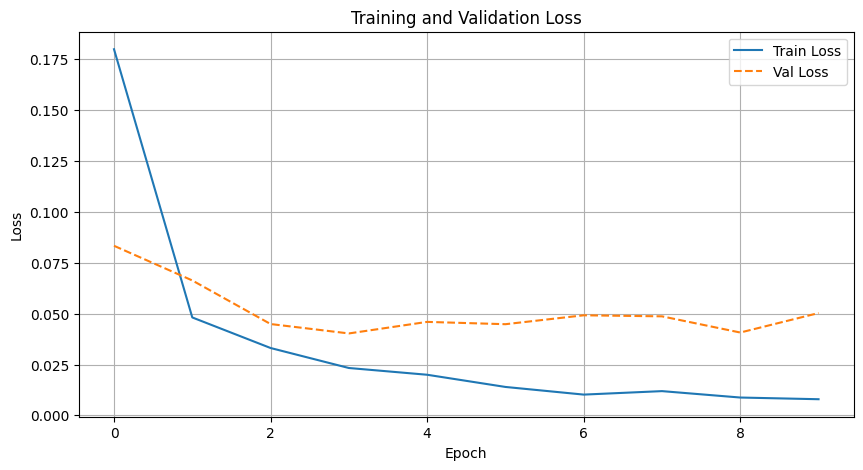

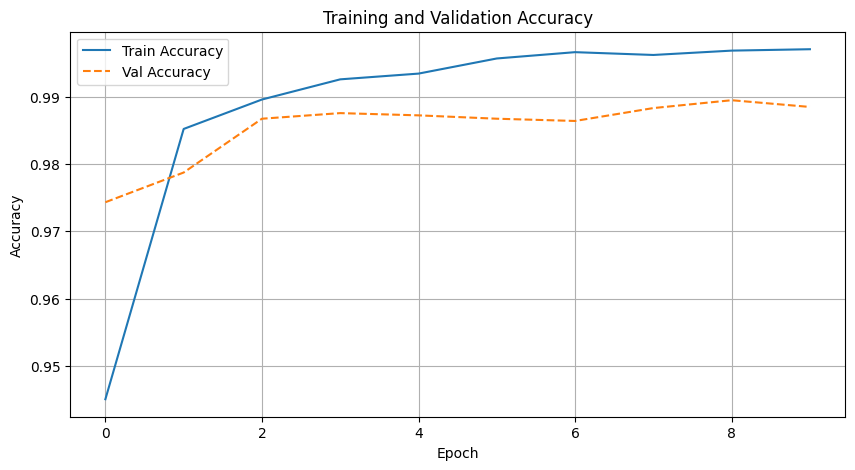

In [12]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [13]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: CNN_MNIST


Evaluating model: CNN_MNIST_model.pth: 100%|██████████| 157/157 [00:02<00:00, 75.80it/s]

Predictions and labels saved to CNN_MNIST_predictions.json


## Show metrics

Metrics for CNN_MNIST:
  - Test Accuracy: 0.9898
  - Precision: 0.9898
  - Recall: 0.9898
  - F1 Score: 0.9898


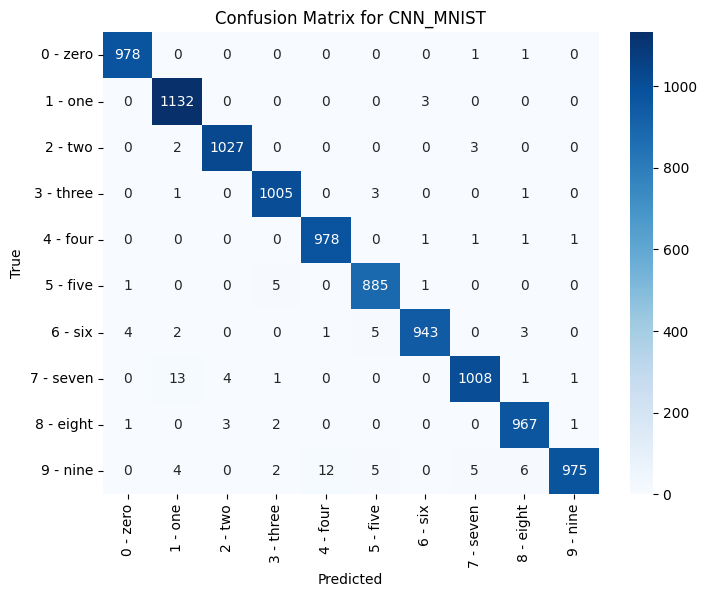

In [14]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [15]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [60]:
data_splits_file = "mnist_data_splits.json"
unlearn_samples_file = "mnist_samples_to_unlearn_5per.json"
updated_data_splits_path = "updated_mnist_data_splits.json"

In [61]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 132959044740928, Optimizer ID: 132958297804224, Criterion ID: 132958297802688


### Init data

In [62]:
dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Select samples to unlearn

In [45]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.2)

Unlearn indices saved to mnist_samples_to_unlearn_20per.json


## Update data splits -> delete samples

In [63]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_mnist_data_splits.json


## Recreate DataLoaders from json files

In [64]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset), 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [65]:
import time
start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 76.40it/s]


Epoch [1/10], Train Loss: 0.2000, Train Accuracy: 0.9385, Val Loss: 0.0678, Val Accuracy: 0.9793
Epoch 1: New best validation accuracy: 0.9793. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 82.67it/s]


Epoch [2/10], Train Loss: 0.0542, Train Accuracy: 0.9829, Val Loss: 0.0477, Val Accuracy: 0.9854
Epoch 2: New best validation accuracy: 0.9854. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 80.03it/s]


Epoch [3/10], Train Loss: 0.0353, Train Accuracy: 0.9890, Val Loss: 0.0502, Val Accuracy: 0.9854


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 81.85it/s]


Epoch [4/10], Train Loss: 0.0257, Train Accuracy: 0.9921, Val Loss: 0.0469, Val Accuracy: 0.9863
Epoch 4: New best validation accuracy: 0.9863. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 78.78it/s]


Epoch [5/10], Train Loss: 0.0217, Train Accuracy: 0.9929, Val Loss: 0.0470, Val Accuracy: 0.9876
Epoch 5: New best validation accuracy: 0.9876. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 73.84it/s]


Epoch [6/10], Train Loss: 0.0166, Train Accuracy: 0.9943, Val Loss: 0.0378, Val Accuracy: 0.9902
Epoch 6: New best validation accuracy: 0.9902. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 72.36it/s]


Epoch [7/10], Train Loss: 0.0110, Train Accuracy: 0.9967, Val Loss: 0.0456, Val Accuracy: 0.9888


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 72.29it/s]


Epoch [8/10], Train Loss: 0.0107, Train Accuracy: 0.9965, Val Loss: 0.0452, Val Accuracy: 0.9871


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 73.37it/s]


Epoch [9/10], Train Loss: 0.0090, Train Accuracy: 0.9963, Val Loss: 0.0477, Val Accuracy: 0.9897


Evaluating on validation set...: 100%|██████████| 179/179 [00:02<00:00, 71.77it/s]

Epoch [10/10], Train Loss: 0.0068, Train Accuracy: 0.9976, Val Loss: 0.0439, Val Accuracy: 0.9904
Epoch 10: New best validation accuracy: 0.9904. Model saved to naive_unlearning_CNN_MNIST_model.pth.
Training complete for naive_unlearning_CNN_MNIST. Training stats saved to 'naive_unlearning_CNN_MNIST_history.json'.
Execution time: 154.065183 seconds


## Plot history losses

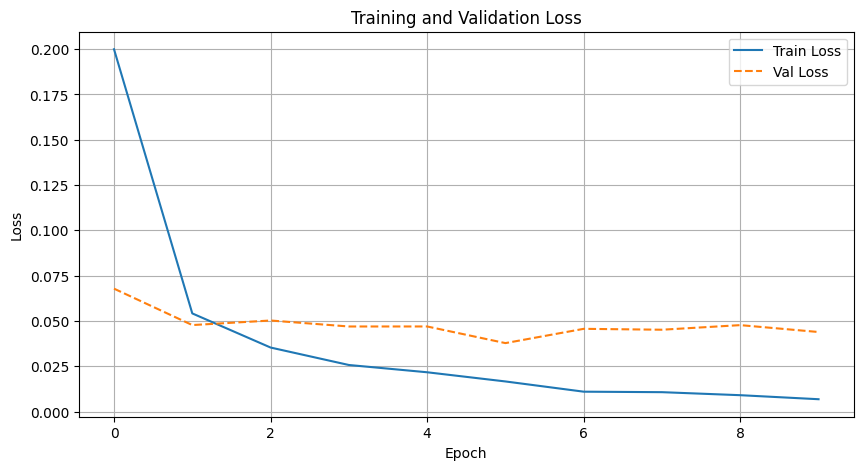

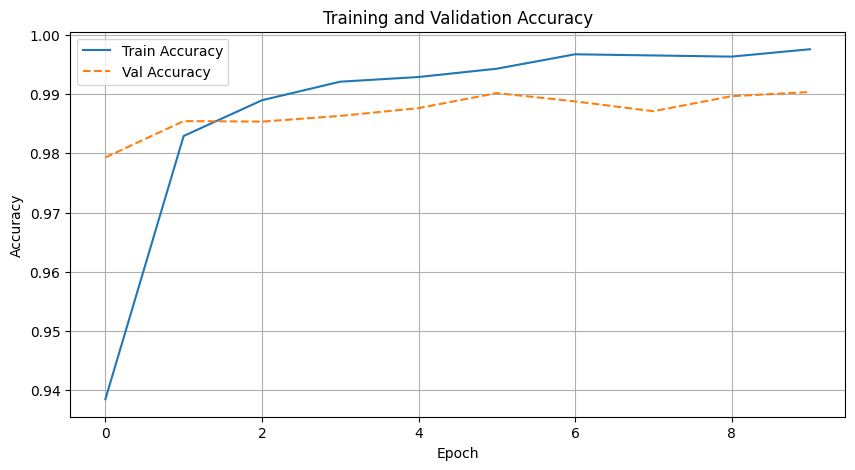

In [66]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [67]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_CNN_MNIST


Evaluating model: naive_unlearning_CNN_MNIST_model.pth: 100%|██████████| 157/157 [00:02<00:00, 71.99it/s]

Predictions and labels saved to naive_unlearning_CNN_MNIST_predictions.json


## Show metrics

Metrics for naive_unlearning_CNN_MNIST:
  - Test Accuracy: 0.9915
  - Precision: 0.9915
  - Recall: 0.9915
  - F1 Score: 0.9915


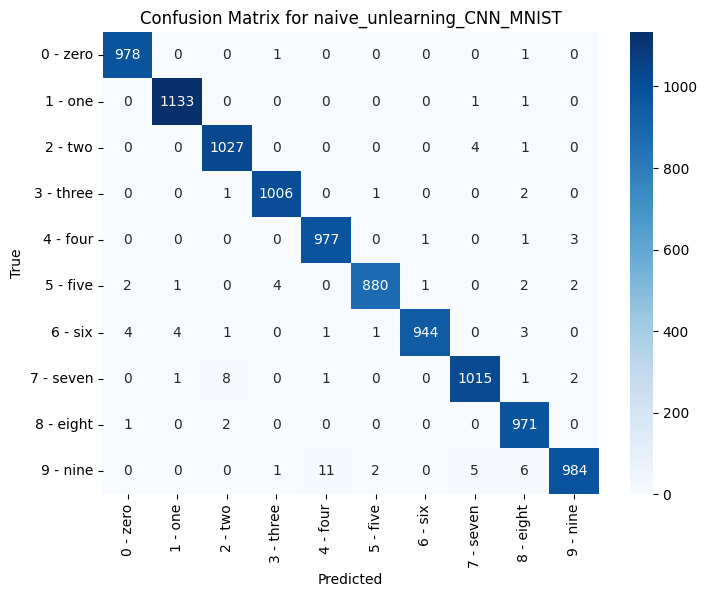

In [68]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)